In [1]:
import pandas as pd
import networkx as nx
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np
import random

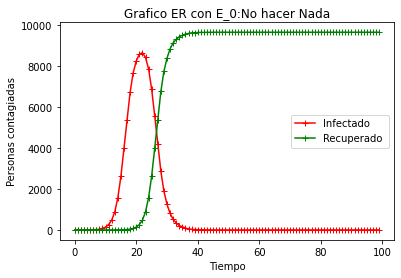

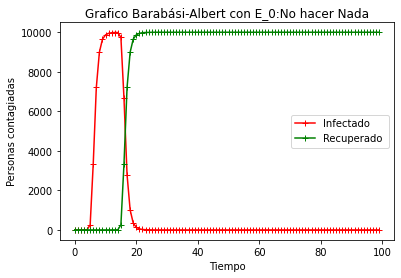

In [3]:

def Vaccination_SIR (G,T,type_vaccine,vaccination_day,p_infected,Poblacion):
    #Inicializamos los nodos del Grafo para que todos inicien en los mismos atributos.
    # State = 0 Susceptible
    # State = 1 Infectado
    # State = 2 Recuperado
    # TimeInfected = 0
    # NeighborsNode = lista de nodos a los que esta conectado
    for u in G.nodes(): 
        G.nodes[u]["State"] = 0
        G.nodes[u]["TimeInfected"] = 0
        G.nodes[u]["NeighborsNode"] = [n for n in G.neighbors(u)]
        
    #Inicializamos array para contabilizar e ir guardando los datos para despues graficarlos.
    susceptible = np.zeros(T) #Hacemos un array de T tiempos en dia al igual que para el resto.
    infected = np.zeros(T)
    recovered = np.zeros(T)
    nodes_vacinnate=[] #guardaremos los nodos que se vacunaran con el fin de que no se repitan.
    #Inicializamos el nodo infectado aleatorimente
    nodo_init_infect = random.randrange(0,Poblacion-1,1) #Buscamos un numero aleatorio entre 0 y 9999 para que este sea el infectado numero 1.
    G.nodes[nodo_init_infect]["State"] = 1 #Con el numero aleatorio, le cambiamos el estado a ese nodo a Infectado.
    infected[0]=1 #inicializamos que en el tiempo 0, tenemos 1 infectado
    susceptible[0]=9999 # inicializamos que en el tiempo 0, tenemos 9999 nodos suceptibles
    
    for t in range(1,T): #Ciclo for para recorrer el Tiempo
        susceptible[t] = susceptible[t-1] #Inicializamos las variables para luego poder ir guardando en ella y asi graficarlas
        infected[t] = infected[t-1]
        recovered[t] = recovered[t-1]
        if type_vaccine == 1 and t==vaccination_day: #Si se escogio el tipo de vacunacion 1 (E_1).
            i=0
            while i< amount_vaccine: #mientras los vacunados sean menor a la cantidad de vacunas
                node=random.randrange(0,Poblacion-1,1) #escogemos un nodo al azar para vacunarlo
                nodes_vacinnate.append(node) #guardamos el nodo en una lista
                
                i=i+1
                if G.nodes[node]["State"] == 2: #si el nodo esta recuperado, se puede vacunar porque no estaba en la lista de vacunados
                    G.nodes[node]["TimeInfected"]=0
                if G.nodes[node]["State"] == 0: #si el nodo es susceptible, se vacuna y pasa a recuperado. 
                    G.nodes[node]["State"] = 2
                    recovered[t] += 1 # como se vacuno un nodo, se aumenta en 1 los recuperados
                if G.nodes[node]["State"] == 1: #si el nodo esta infectado se vacuna y pasa a recuperado
                    G.nodes[node]["State"] = 2
                    G.nodes[node]["TimeInfected"]=0
                    recovered[t] += 1 # como se vacuno un nodo, se aumenta en 1 los recuperados
                    infected[t] += -1 # como se vacuno un nodo y estaba infectado, se disminuye en 1 los infectados
     
        if type_vaccine == 2 and t==vaccination_day: #Si se escogio el tipo de vacunacion 2 (E_2).
            list_nodes=[]
            for n in G.nodes(): #se hace un listado de tuplas con el numero de nodo y su grado
                a=G.degree(n)
                list_nodes.append([n,a])
            i=0
            while i<amount_vaccine:   
                max_node=max(list_nodes) #se determina el nodo maximo existente en la lista
                node,degree=max_node   #se separa la tupla del nodo maximo, para poder trabajar con el.
                i=i+1
                if G.nodes[node]["State"] == 2: #Si el nodo esta recuperado se vacuna y se elimina el nodo maximo de la lista
                    G.nodes[node]["TimeInfected"]=0
                    list_nodes.remove(max_node) 
                elif G.nodes[node]["State"] == 0: #Si el nodo esta susceptible se vacuna y se elimina el nodo maximo de la lista
                    G.nodes[node]["State"] = 2    #Ademas se aumenta en 1 los recuperados.
                    recovered[t] += 1
                    list_nodes.remove(max_node)
                elif G.nodes[node]["State"] == 1: #Si el nodo esta infectado se vacuna y se elimina el nodo maximo de la lista
                    G.nodes[node]["State"] = 2    #Ademas se aumenta en 1 los recuperados y se disminuye en 1 los infectados
                    G.nodes[node]["TimeInfected"]=0
                    recovered[t] += 1
                    infected[t] += -1
                    list_nodes.remove(max_node)
                
        if type_vaccine == 3 and t==vaccination_day: #Si se escogio el tipo de vacunacion 2 (E_2).
            i=0
            while i < amount_vaccine: #Mientras la cantidad de vacunados sea menor que numero de vacunas
                node = random.randrange(0,Poblacion-1,1) #escogemos un nodo aleatoriamente
                nodes_neighbors=G.nodes[node]["NeighborsNode"] #hacemos una lista con sus nodos vecinos
                nodes_vacinnate.append(node) #guardamos el nodo en una lista para poder consultarla
                
                i=i+1 #Aumentamos en 1 las vacunas puestas
                if G.nodes[node]["State"] == 2:  #Si el nodo esta recuperado se vacuna y se sigue la misma logica anterior
                    G.nodes[node]["TimeInfected"]=0
                elif G.nodes[node]["State"] == 0:
                    G.nodes[node]["State"] = 2
                    recovered[t] += 1
                elif G.nodes[node]["State"] == 1:
                    G.nodes[node]["State"] = 2
                    G.nodes[node]["TimeInfected"]=0
                    recovered[t] += 1
                    infected[t] += -1
                for n in nodes_neighbors: #hacemos un ciclo con los vecinos para vacunar a los que no estan vacunados
                    i=i+1
                    if G.nodes[n]["State"] == 2: #se sigue la misma logica anterior
                        G.nodes[node]["TimeInfected"]=0
                    elif G.nodes[n]["State"] == 0:
                        G.nodes[n]["State"] = 2
                        recovered[t] += 1
                    elif G.nodes[n]["State"] == 1:
                        G.nodes[n]["State"] = 2
                        G.nodes[n]["TimeInfected"]=0
                        recovered[t] += 1
                        infected[t] += -1
                             
    
        for u in G.nodes(): #se recorre los nodos para chequear los infectados y aumentar en 1 su tiempo de infectado
            if G.nodes[u]["State"] == 1:
                if G.nodes[u]["TimeInfected"] <= 8:
                    G.nodes[u]["TimeInfected"]+=1
                            
                elif G.nodes[u]["TimeInfected"] > 8:
                    G.nodes[u]["State"] = 2
                    recovered[t] += 1
                    infected[t] += -1
        for u in G.nodes(): #se recorre los nodos para ver sus vecinos y ver si se debe infectar
            if G.nodes[u]["State"] == 0:
                nodes_neighbors=G.nodes[u]["NeighborsNode"] #lista de vecinos del nodo
                for i in nodes_neighbors:  #se recorre los vecinos  
                    if G.nodes[i]["State"]==1: # si el vecino esta infectado
                        if np.random.rand() <= p_infected: #se infectara con una probabilidad de p=0.2, cambia su estado, aumenta en 1 los infectados y disminuyen los susceptibles
                            G.nodes[u]["State"] = 1
                            infected[t] += 1
                            susceptible[t] += -1
                            break

    return infected,recovered

#Inicializamos un Grafo ER,con 10.000 nodos y un grado de probabilidad de 0.4
Poblacion=10000
k=4 #grado promedio del Grafo
G1 = nx.erdos_renyi_graph(Poblacion,k/Poblacion)
G2 = nx.barabasi_albert_graph(Poblacion, k)
p_infected = 0.2 #probabilidad de ser infectado al estar en contacto con alguien infectado
T = 100 #tiempo en dias 
amount_vaccine=500
vaccination_day=1
type_vaccine=1



#Grafico ER con E_0:No hacer Nada
infec,recov = Vaccination_SIR (G1,T,0,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico ER con E_0:No hacer Nada")
plt.legend()
plt.show()

#Grafico Barabási-Albert con E_0:No hacer Nada
infec,recov = Vaccination_SIR (G2,T,0,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico Barabási-Albert con E_0:No hacer Nada")
plt.legend()
plt.show()

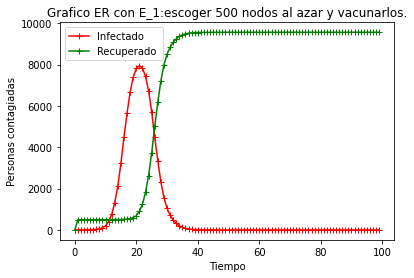

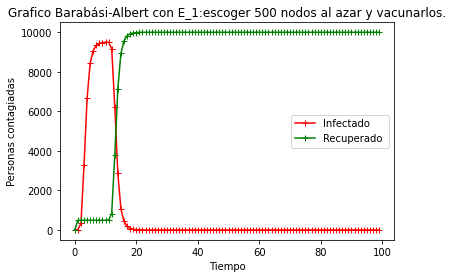

In [36]:

#Grafico ER con E_1:escoger 500 nodos al azar y vacunarlos.
infec,recov = Vaccination_SIR (G1,T,1,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico ER con E_1:escoger 500 nodos al azar y vacunarlos.")
plt.legend()
plt.show()

#Grafico Barabási-Albert con E_1:escoger 500 nodos al azar y vacunarlos.
infec,recov = Vaccination_SIR (G2,T,1,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico Barabási-Albert con E_1:escoger 500 nodos al azar y vacunarlos.")
plt.legend()
plt.show()



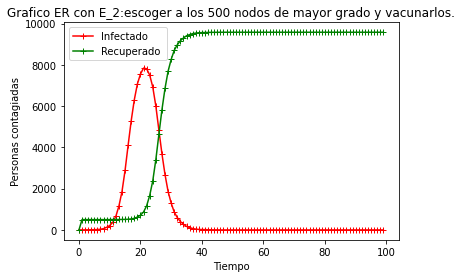

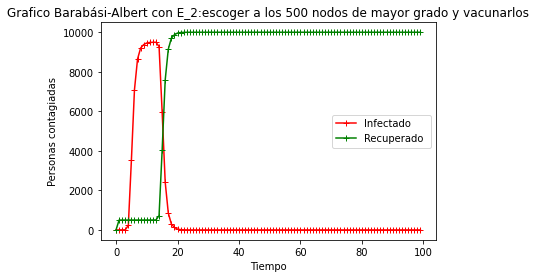

In [37]:
#Grafico ER con E_2:escoger a los 500 nodos de mayor grado y vacunarlos.
infec,recov = Vaccination_SIR (G1,T,2,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico ER con E_2:escoger a los 500 nodos de mayor grado y vacunarlos.")
plt.legend()
plt.show()

#Grafico Barabási-Albert con E_2:escoger a los 500 nodos de mayor grado y vacunarlos
infec,recov = Vaccination_SIR (G2,T,2,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico Barabási-Albert con E_2:escoger a los 500 nodos de mayor grado y vacunarlos")
plt.legend()
plt.show()


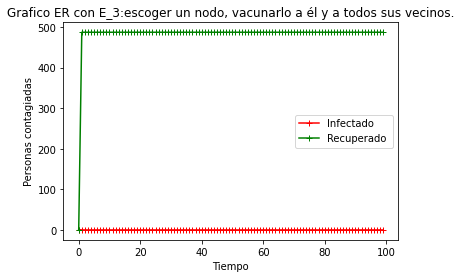

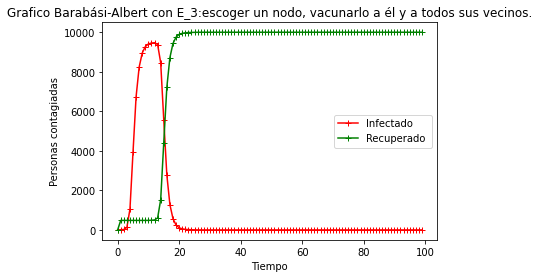

In [38]:
#Grafico ER con E_3:escoger un nodo, vacunarlo a él y a todos sus vecinos.
infec,recov = Vaccination_SIR (G1,T,3,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico ER con E_3:escoger un nodo, vacunarlo a él y a todos sus vecinos.")
plt.legend()
plt.show()

#Grafico Barabási-Albert con E_3:escoger un nodo, vacunarlo a él y a todos sus vecinos.
infec,recov = Vaccination_SIR (G2,T,3,1,p_infected,Poblacion)              
plt.plot(infec, color='r',marker='+', label="Infectado ")
plt.plot(recov, color='g',marker='+', label="Recuperado ")
plt.xlabel("Tiempo")
plt.ylabel("Personas contagiadas")
plt.title("Grafico Barabási-Albert con E_3:escoger un nodo, vacunarlo a él y a todos sus vecinos.")
plt.legend()
plt.show()

